# Linear Regression : From the scratch
### In this notebook, the linear regression has been implemented without using the `scikit-learn` library

#### important things to remember
1. predicted values 
2. weights and bias
3. mean squared error
4. gradient descent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#lets import the dataset
data_df = pd.read_csv("Auto insurance dataset.csv")

In [3]:
data_df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


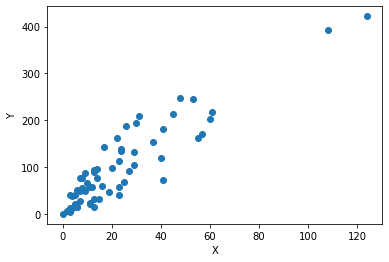

In [4]:
#lets check the dependies of the variables
plt.scatter(data_df.X, data_df.Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

this is basically following a linear relation. we can fit the dataset by a line which is usually done by Linear regression using Scikit learn . But in this notebook it is done without the sklearn

In [5]:
from random import seed
from random import randrange

In [10]:
#lets make a function to split the data into train and test set
def split(data, test_split_ratio):
    test_df = pd.DataFrame()
    data_size= data.shape[0]
    test_size= test_split_ratio *data_size
    train_df = data.copy()
    while (len(test_df)<(test_size)):
        indexes = randrange(data_size)
        
        test_df = test_df.append(data.iloc[indexes])
        
        train_df = train_df.drop(train_df.index[[indexes]])        
    return train_df, test_df

In [11]:
train_df, test_df = split(data_df, 0.2)

In [12]:
train_df.shape

(50, 2)

In [13]:
test_df.shape

(13, 2)

In [156]:
# defining the gradient descent function
def gradient_descent(w,b,data, learning_rate):
    dw= 0
    db=0
    for i in range(len(data)):
        x= data.iloc[i].X
        y= data.iloc[i].Y
        dw += -(2/len(data))*x*(y-(w*x+b))
        db += -(2/len(data))*(y-(w*x+b))
    w = w - dw * learning_rate
    b= b - db* learning_rate
    return w,b

#prediction
def predict(w,b,data):
    prediction=[]
    for i in range(len(data)):
        x= data.iloc[i].X
        prediction.append(w*x+b)
    return prediction

#rmse function
def rmse(w, b, data):
    error=0
    for i in range(len(data)):
        x= data.iloc[i].X
        y= data.iloc[i].Y
        error += (y- (w*x +b))**2
    return sqrt(error/float(len(data)))

In [165]:
#for trainset
max_iter =500
lr= 0.00001
w=0
b=0
for i in range(1000):
    w,b=gradient_descent(w,b,train_df, lr)
print("weight:", w)
print("bias: ", b)

weight: 3.704036935570256
bias:  0.2683936731429021


In [166]:
rmse(w, b, train_df)

36.78765898695427

In [167]:
rmse(w, b, test_df)

33.618293115407155

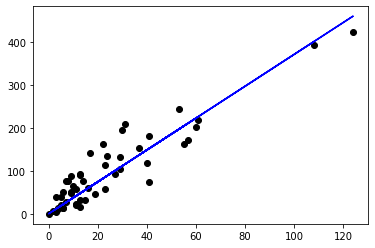

In [170]:
plt.scatter(train_df.X, train_df.Y, color= 'Black');
plt.plot(train_df.X, predict(w, b, train_df), color = "blue");

This is the linear regression without using numpy library and sklearn